# NASA Space Apps Challenge 2019: Iris and Cartopy Tutorial

### Friday 18th October 2019, 11:00 - 12:30

This tutorial introduces Iris and Cartopy, two open-source Python libraries written and maintained by the AVD Team at the Met Office.

## Contents

<ol>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#Brief-Intro-to-Numpy-and-Matplotlib">Brief Intro to Numpy and Matplotlib</a></li>
    <li><a href="#Iris">Iris</a></li>
    <li><a href="#Cartopy">Cartopy</a></li>
    <li><a href="#Final-Exercise">Final Exercise</a></li>
</ol>


## Introduction
### About Scitools

Scitools is a collection of Python-based open source tools for Earth scientists to analyse and visualise their data.

[Iris](https://scitools.org.uk/iris/docs/latest/) and [Cartopy](https://github.com/SciTools/cartopy) are two of the key packages. 

<table align="left"><tr>
    <td> <img src="images/iris_logo.png" style="width: 250px;"/> </td>
    <td> <img src="images/cartopy_logo.png" style="width: 250px;"/> </td>
</tr></table>

**Iris** does data manipulation and file i/o, using other third-party python packages such as:
  * [numpy](https://github.com/numpy/numpy)
  * [scipy](https://github.com/scipy/scipy)
  * [netCDF4-python](https://github.com/Unidata/netcdf4-python)
  * [dask](https://dask.pydata.org/en/latest/)

**Cartopy** adds data visualisation and mapping, based on :
  * [matplotlib](https//github.com/matplotlib/matplotlib)
  * [proj4](https://github.com/OSGeo/PROJ)

### Further Resources
This is only a _very brief_ overview of Iris and Cartopy. To find out more, see the below links.

There are online introductory self-teach courses here:
   * https://github.com/SciTools/courses
   
Full documentation can be found below:
   * https://scitools.org.uk/iris/docs/latest/
   * https://scitools.org.uk/cartopy/docs/latest/

### Acknowledgements
Much of the Iris and Cartopy sections in this tutorial are based on a tutorial previously given by Peter Killick, with subsequent modifications made by Patrick Peglar and Alastair Gemmell.

### Set Up

Let's import the libraries we'll need for this notebook

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader
import iris
import matplotlib.pyplot as plt
import numpy as np

***

## Brief Intro to Numpy and Matplotlib

As Iris and Cartopy build on Numpy and Matplotlib, we start by briefly covering the basics of these libraries.

In this section we will cover,
<ol>
    <li><a href="#Numpy">Numpy</a></li>
    <ul>
        <li><a href="#Numpy:-Exercise">Exercise</a></li>
        <li><a href="#Numpy:-Further-Resources">Further-Resources</a></li>
    </ul>
    <li><a href="#Matplotlib">Matplotlib</a></li>
        <ul>
        <li><a href="#Matplotlib:-Exercise">Exercise</a></li>
        <li><a href="#Matplotlib:-Further-Resources">Further-Resources</a></li>
    </ul>
</ol>

### Numpy

[Numpy](https://numpy.org) is a library for working with multidimensional data. The core object, a numpy array, stores the data values.

Numpy provides many functions to easily create arrays. Below shows examples of creating an array where all the values are `1` and creating an array of random values.

In [ ]:
# Create a 3D array of ones of shape (2,3,3)
ones = np.ones((2, 3, 3))
print(ones)

In [ ]:
# Create a 2D array of random values, of shape (2,2)
random_array = np.random.random((3, 5))
print(random_array)

We can select a subset of the data array with indexing.

We describe what data we want to extract by specifying a index for each dimension.

In [ ]:
# Create an array from a nested Python list.
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Select the first two rows from the first dimension, and the 1st column
subset = a[0:2, 1]
print(subset)

Numpy allows you to do mathematical operations on these numpy arrays.

For example we can perform multiply each element in the array by a value.

In [ ]:
# Multiply the `a` array by 10.
multiply_10 = a * 10
print(multiply_10)

We can also calculate the average value in the array, or sum all values in the array.

In [ ]:
# Calculate the mean value of the array. 
a_mean = np.mean(a)
print(a_mean)

In [ ]:
# Sum all values in the array.
a_sum = np.sum(a)
print(a_sum)

#### Numpy: Exercise
Your turn! 
Apply what you have learnt so far to do the following:
1. Using `np.ones` create an array of shape (2, 3).
2. Add 5 to each element.
3. Compute the sum of all the values in the array from step 2.


#### Numpy: Further Resources

For more information, see the Numpy Documentation:
* https://docs.scipy.org/doc/numpy/

Particularly, the reference manual, which explains each function and object in detail, often with helpful examples:
* https://docs.scipy.org/doc/numpy/reference/index.html

### Matplotlib

[Matplotlib](https://matplotlib.org/index.html) is a widely used Python package to produce 2D graphics.

A convenient way to use Matplotlib is via the `pyplot` sub-package which is usually imported as `plt`. Below we create a simple line plot using `plt.plot`

In [ ]:
plt.plot([1, 10, 5, 20])
plt.show()

Matplotlib provides many different types of plot. For example below we create a 2D numpy array of random values then plot a pcolourmesh of this data.

In [ ]:
data = np.random.random((10, 10))
plt.pcolormesh(data)

When matplotlib creates a plot, it will create an `Axes` object. You can use this axes object to modify your plot, such as adding a title or other annotations.

Below we create a scatter plot and then add a title and an x- and y-axis label.

In [ ]:
x = np.random.random((100,))
y = np.random.random((100,))

plt.scatter(x, y)
ax = plt.gca() # Get the current axes object.
ax.set_title("Scatter Plot of Random x's and y's")
ax.set_xlabel("Random x's")
ax.set_ylabel("Random y's")
plt.savefig('simple.png')
plt.show()

In the above example, we saved the figure matplotlib produced using `plt.savefig`. _NOTE:_ you must do this before calling `plt.show`.

### Matplotlib: Exercise

Apply what you have learnt about Numpy and Matplotlib to do the following
1. Create a random array of shape (5,)
2. Using `plt.plot` create a line plot of this array

### Matplotlib: Further Resources

As with Numpy, Matplotlib is widely used and so there is a extensive amount of help online, include many nice examples.

For more information, see:
* [Matplotlib documentation](https://matplotlib.org/index.html)
* [Matplotlib gallery of examples](https://matplotlib.org/gallery/index.html)


***

## Iris

Iris provides a consistent Python interface for loading, saving, analysing and visualising different weather and climate data formats.

Iris supports loading of all major weather and climate fileformats - NetCDF, GRIB, FF & PP. Iris maintains the single common cube data model when loading datasets stored in all these different formats. This means all these file formats will be represented equivalently in Iris.

In this section we will cover:
<ol>
    <li><a href="#The Cube">The Cube</a></li>
    <li><a href="#Coordinates">Coordinates</a></li>
    <li><a href="#Subsetting-Cubes">Subsetting Cubes</a></li>
    <li><a href="#Combining-Cubes">Combining Cubes</a></li>
    <li><a href="#Plotting">Plotting</a></li>
    <li><a href="#Analysis-and-Statistics">Analysis and Statistics</a></li>
</ol>

### The Cube

The cube is the data model used by Iris to represent to represents all datasets loaded in Iris. It is a Python object. At its most basic, a cube contains data (commonly a NumPy array) and metadata that describes the NumPy array (such as what the data in the NumPy array describe, the units of the data, where in space and time the data describe, and so on).

To add some detail to this, a cube contains:

* a single name (or "phenomenon") and units that describes what the cube represents
* data (commonly a NumPy or dask array with a given shape) that are the actual values recorded for the phenomenon
* coordinates that describe how the data are located in time and space
* further metadata that describes the dataset, including:
    * general attributes
    * cell methods for describing statistical operations that have been applied to the dataset
    * cell measures for describing the weighting of coordinate points
    
Let's take a simple example to demonstrate the Cube concept.

Suppose we have a ``(3, 2, 4)`` NumPy array:

![](images/multi_array.png)

Where dimensions 0, 1, and 2 have lengths 3, 2 and 4 respectively.

The Iris Cube to represent this data may consist of:

 * a standard name of "air_temperature" and units of "kelvin"

 * a data array of shape ``(3, 2, 4)``

 * a coordinate, mapping to dimension 0, consisting of:
     * a standard name of "height" and units of "meters"
     * an array of length 3 representing the 3 height points
     
 * a coordinate, mapping to dimension 1, consisting of:
     * a standard name of "latitude" and units of "degrees"
     * an array of length 2 representing the 2 latitude points
     * a coordinate system such that the latitude points could be fully located on the globe
     
 * a coordinate, mapping to dimension 2, consisting of:
     * a standard name of "longitude" and units of "degrees"
     * an array of length 4 representing the 4 longitude points
     * a coordinate system such that the longitude points could be fully located on the globe

Pictorially the Cube has taken on more information than a simple array:

![](images/multi_array_to_cube.png)

Let's load a file from the [Iris sample data](https://github.com/SciTools/iris-sample-data) repository as an Iris cube and print the cube to take a look at Iris' representation of the cube object:

In [ ]:
fname = iris.sample_data_path('A1B_north_america.nc')
print(fname)

In [ ]:
cubes = iris.load(fname)
print(cubes)

`iris.load` returns an `iris.cube.CubeList` of all the cubes found in the file. From the above print out, we can see that Iris has found and loaded one cube in the given file. This dataset contains air temperature, measured in Kelvin, over North America, according to the A1B climate scenario. The cube represents 3D (time, latitude, longitude) data.

To inspect the "air_temperature" cube more closely, we can index the "zeroth" cube:

In [ ]:
a1b_cube = cubes[0]
a1b_cube

Cubelists are unordered and so indexing is not a reliable method of selecting a particular cube. Instead, the recommended approach is to use constraints. 

The example below demonstrates how to tell Iris to only load the `air_temperature` cube.

In [ ]:
a1b_cube = iris.load_cube(fname, 'air_temperature')
a1b_cube

Constraints are discussed further in the "Subsetting Cubes" section below, 

### Coordinates

Coordinates are used to describe the location of a cube's data. This could be location on the earth's surface (i.e. latitudes and longitudes), in height (including hybrid height / pressure), time, realisation, and occasionally more unusual dimensions.

Iris defines three types of coordinate:
* **dimension coordinates** are strictly 1D, numeric and monotonic. They describe and name one of a cube's dimensions.
* **auxiliary coordinates** have no restrictions on dimensionality or coordinate values. They are secondary (i.e. "auxiliary") metadata for describing one or more cube dimensions. E.g *'Forecast Period'* in the *alb_cube* above
* **scalar coordinates** contain only a single value that is true for every point within the cube's data. E.g. *'height'* in the *alb_cube* above.

Let's take a closer look at accessing the A1B cube's time coordinate:

In [ ]:
t_coord = a1b_cube.coord('time')
print(t_coord[:10])

### Subsetting Cubes

Iris provides a couple of different mechanisms for subsetting a cube: **indexing** and **constraints / extract**.

Cubes can be **indexed** like NumPy arrays:

In [ ]:
# Index the cube to get the first 10 time values, a single latitude value, and 5 longitude values.
a1b_cube[:10, 15, 5:10]

Subsetting a cube by selecting a range of coordinate values, can be performed with Constraints:

In [ ]:
# Extract from the cube based on latitude and longitude coordinate values.
# Coordinate values can be specified directly or via an inequality.
lat_lon_values = {'latitude': [16.25, 17.5 , 18.75, 20.],
                  'longitude': lambda cell: 255. <= cell < 300.}
lat_lon_constraint = iris.Constraint(coord_values=lat_lon_values)

lat_lon_subset_cube = a1b_cube.extract(lat_lon_constraint)
lat_lon_subset_cube

### Combining Cubes

Iris provides functionality that takes a number of existing cubes and combines them to produce fewer output cubes:
* **merge** takes multiple cubes that differ only in a scalar coordinate values and combines them to produce a new cube with a new dimension created from the scalar coordinate values

![](images/merge.png)

* **concatenate** extends an existing dimension on a cube by adding another cube to the end of the dimension.

![](images/concat.png)


Let's take a quick look at an example of concatenating a number of cubes:

In [ ]:
cube_0 = a1b_cube[:120]
cube_1 = a1b_cube[120:]
temp_cubes = iris.cube.CubeList([cube_0, cube_1])
print(temp_cubes)

We can concatenate these cubes together, producing a new cube:

In [ ]:
concat_cube = temp_cubes.concatenate_cube()
print(concat_cube)

### Analysis and Statistics

Let's perform some analysis on our air_temperature values by statistically collapsing the time dimension to find the mean average air temperature over time at each `(latitude, longitude)` grid point:

In [ ]:
time_mean_cube = a1b_cube.collapsed('time', iris.analysis.MEAN)
print(a1b_cube)
print('--' * 50)
print(time_mean_cube)

We have lost (or "consumed") the time dimension by collapsing along it. The data of the resultant 2D cube records the mean average air temperature at each grid point.

Iris contains a number of different statistical operators that can be applied in this way, including `mean` (as above), `std`, `min`, `max`, `percentile` and others. Iris can also define custom categorisations for a coordinate and `aggregate_by` the different categorisations, and also collapse on a `rolling_window`.

### Visualisation

We can plot the collapsed 2D cube to produce a map showing the mean average air temperature over north America according to the A1B climate scenario. Iris provides various plotting routines from matplotlib that have been made cube-aware. Iris plotting also integrates seamlessly with matplotlib, so in the cell below we produce a plot using Iris plotting functionality and show it using matplotlib functionality:

In [ ]:
# iris quick-plots interface
import iris.quickplot as qplt

qplt.pcolormesh(time_mean_cube, cmap='inferno')
plt.show()

We'll look in more detail at what's going on here in the section below on Cartopy.

We could also use a constraint (like shown above) to extract all the time values at a single point and plot the change in air temperature at that point over time. For example, let's find out how air temperature changes over time in New York:

In [ ]:
ny_lat = 40.42
ny_lon = 286.00

# Use approximate horizontal resolution to make sure we extract the grid box
# containing New York.
lat_res = 0.5
lon_res = 0.9
location_lat = lambda cell: ny_lat - lat_res <= cell <= ny_lat + lat_res
location_lon = lambda cell: ny_lon - lon_res <= cell <= ny_lon + lon_res

ny_location_constraint = iris.Constraint(latitude=location_lat,
                                         longitude=location_lon)
ny_location_cube = a1b_cube.extract(ny_location_constraint)

print(ny_location_cube)

In [ ]:
qplt.plot(ny_location_cube)
plt.show()

***

## Cartopy

[Cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) adds cartographic map production functionality to matplotlib allowing plotting of geolocated data onto map projections of the earth's surface. 

In this section we will cover:
<ol>
    <li><a href="#Map-Projections">Map Projections</a></li>
    <li><a href="#Using-projection-and-transform">Using projection and transform</a></li>
    <li><a href="#The-Feature-Interface">The Feature Interface</a></li>
    <li><a href="#Extraterrestrial-Cartography">Extraterrestrial Cartography</a></li>
</ol>

### Map Projections

There are numerous ways of "flattening" the Earth's 3D surface so that it can be visualised in two dimensions, on a screen or a piece of paper.

In cartopy you can specify the type of map projection using the `projection` keyword.

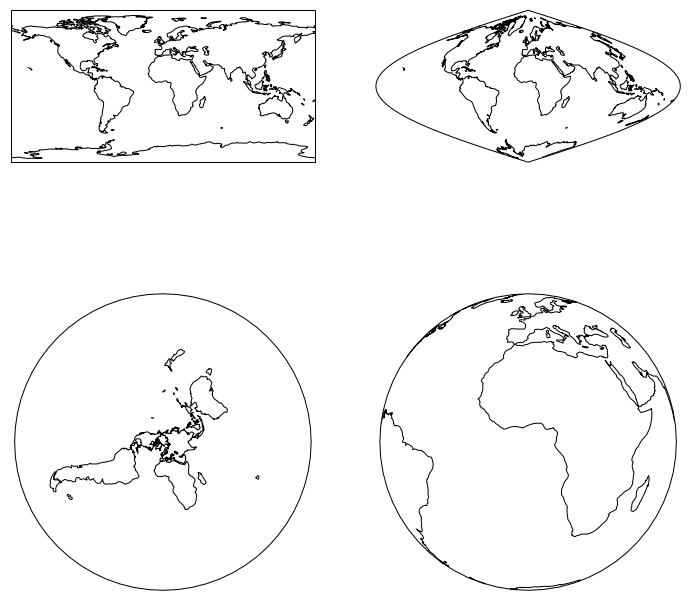

In [46]:
# Make sure the figure is a decent size when plotted.
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Sinusoidal())
ax2.coastlines()

ax1 = fig.add_subplot(2, 2, 3, projection=ccrs.NorthPolarStereo())
ax1.coastlines()

ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Geostationary())
ax2.coastlines()

# Show all subplots on the same figure.
plt.show()

Cartopy uses the `proj.4` library to provide map projections that can be used to plot geolocated data. We've already used this functionality when we produced the map plot of the mean average air temperatures over north America. In this case the projection used for the map was the coordinate reference system specified by the cube's `latitude` and `longitude` coordinates:

In [ ]:
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax = plt.gca()
ax.coastlines()
plt.show()

We can also specify the projection we wish to show our data in by using the `projection` keyword argument when setting up a cartopy geoaxes instance. In this case the data to be plotted will be transformed from its coordinate reference system to the specified projection:

In [ ]:
ax = plt.axes(projection=ccrs.LambertConformal())
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax.coastlines()
plt.show()

### Using projection and transform

To accurately geolocate content on a cartopy map we need to use the `projection` and `transform` keyword arguments correctly.

The **projection** keyword is used when setting up an axes instance. It defines the map projection of the resulting plot.

The **transform** keyword is passed to content that will be plotted on a map. It defines the coordinate reference system that  describes the locations of the content being plotted, and is used to transform the locations of the content into the projection of the map that the data will be plotted on. We'll see this in action just a little lower down.

Happily, Iris' close integration with cartopy handles most of this for us automatically:
* if we plot a horizontal slice of a cube (that is, we produce a map), the cube's horizontal coordinates' `coord_system` defines the cartopy plot's `projection`. We refer to this case as "plotting a cube in its native projection".
* if we specify a cartopy plot's `projection` then the cube's horizontal coordinates' `coord_system` defines the `transform` used to add the horizontal slice of the cube to the map.

We saw both of these cases in the maps above.

If we need to add further content to the map we will need to be aware of using these keywords correctly. For example, above we plotted the temperature changes in New York. We could add a point to the Lambert Conformal map that shows the location of New York, making use of the `transform` keyword to make sure New York appears in the correct location on the map:

In [ ]:
# Set up an axes instance with a Lambert Conformal projection
# and add content and coastlines.
ax = plt.axes(projection=ccrs.LambertConformal())
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax.coastlines()

# Now plot New York on the map. Note the use of the `transform` keyword.
plt.scatter(ny_lon, ny_lat, c='g', s=100, zorder=10, transform=ccrs.PlateCarree())

plt.show()

### The Feature Interface

We've used part of the cartopy feature interface to draw the coastlines on these plots. The `coastlines` method is provided as part of the cartopy `GeoAxes` class API as a convenience method. There are a number of commonly used geographic features provided as convenience attributes of the cartopy feature class:

In [ ]:
# Add coastlines to the map.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)  # Equivalent to `ax.coastlines()`
plt.show()

In [ ]:
# Add land and ocean features, that come with preset face colours.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
plt.show()

In [ ]:
# Add country borders.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.BORDERS, linestyle=':')
plt.show()

In [ ]:
# And finally, add lakes and rivers.
plt.figure()
for i_subplot in (211, 212):
    ax = plt.subplot(i_subplot, projection=ccrs.PlateCarree())
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.BORDERS, linestyle=':')
    ax.add_feature(cfeat.LAKES, alpha=0.5)
    ax.add_feature(cfeat.RIVERS)
    if i_subplot == 212:
        ax.set_extent((-175, -90, 40, 70))
plt.show()


### Extraterrestrial Cartography

Cartopy, is not limited to Earth Cartography. This same methods can be applied to any spheroid object, by defining the ellipsoid of the object.

The following example is taken from the [Cartopy gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/eccentric_ellipse.html#sphx-glr-gallery-eccentric-ellipse-py).

The below image shows the topography of the asteroid Vesta.

![](https://www.nasa.gov/sites/default/files/pia17037.jpg)

We would like to reproject this data onto a Geostationary projection.

First we need to define a function that downloads the topography map and returns it, along with information about the coordinate system, and extent of the image.

In [ ]:
from urllib.request import urlopen
from io import BytesIO

from PIL import Image

def vesta_image():
    """
    Return an image of Vesta's topography.

    Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI

    Returns
    -------
    img : numpy array
        The pixels of the image in a numpy array.
    img_proj : cartopy CRS
        The rectangular coordinate system of the image.
    img_extent : tuple of floats
        The extent of the image ``(x0, y0, x1, y1)`` referenced in
        the ``img_proj`` coordinate system.

    """
    url = 'https://www.nasa.gov/sites/default/files/pia17037.jpg'
    img_handle = BytesIO(urlopen(url).read())
    raw_image = Image.open(img_handle)
    # The image is extremely high-resolution, which takes a long time to
    # plot. Sub-sampling reduces the time taken to plot while not
    # significantly altering the integrity of the result.
    smaller_image = raw_image.resize([raw_image.size[0] // 10,
                                      raw_image.size[1] // 10])
    img = np.asarray(smaller_image)
    # We define the semimajor and semiminor axes, but must also tell the
    # globe not to use the WGS84 ellipse, which is its default behaviour.
    img_globe = ccrs.Globe(semimajor_axis=285000., semiminor_axis=229000.,
                           ellipse=None)
    img_proj = ccrs.PlateCarree(globe=img_globe)
    img_extent = (-895353.906273091, 895353.906273091,
                  447676.9531365455, -447676.9531365455)
    return img, img_globe, img_proj, img_extent

We can then use that function to plot the image it returns on a Geostationary projection.

In [ ]:
img, globe, crs, extent = vesta_image()
projection = ccrs.Geostationary(globe=globe)

ax = plt.axes(projection=projection)
ax.imshow(img, transform=crs, extent=extent)
ax.text(0.075, 0.012, "Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI",
         bbox={'facecolor': 'w', 'edgecolor': 'k'})
plt.show()

***

## Final Exercise

Drawing on all that you have learnt in this tutorial, we are going to load in some data, perform some analysis on it and then visualise the result. 

1. Using `iris.load_cube`, load the 'electron density' cube from the following file:

```fname = iris.sample_data_path('space_weather.nc')```

2. Using a constraint, extract data with a height between 100 and 500km.

_Hint: The height coordinate is in metres so ensure you supply the upper and lower limit in this unit_

3. Calculate the mean over the height dimenion of the cube that is returned.

4. Plot a pcolormesh of your final cube. Add coastlines to your plot (_Hint remember you can use_ `plt.gca()` _to access the axes object_)

5. Create a Geostationary projection and plot the cube onto this projection. Again add coastlines.